<img src="https://raw.githubusercontent.com/UXARRAY/uxarray/main/docs/_static/images/logos/uxarray_logo_h_dark.svg"
     width="30%"
     alt="UXarray logo"
     align="right"
/>

# Comparison to Xarray

### In this tutorial, you'll learn about:

* The differences and similarities between UXarray's and Xarray's plotting routines
* Using `hvPlot` with Xarray

### Related Documentation 

* [UXarray Plotting User Guide](https://uxarray.readthedocs.io/en/latest/user-guide/plotting.html)

### Prerequisites

| Concepts                                                       | Importance | Notes |
|----------------------------------------------------------------| --- | --- |
| [Xarray](https://github.com/pydata/xarray) | Necessary | |

**Time to learn**: 5 minutes

-----



## Introduction

For users coming from an Xarray background, much of UXarray's design is familiar. This notebook showcases an example of transitioning a visualization of a structured grid using Xarray into a visualization of an unstructured grid using UXarray.

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import uxarray as ux
import xarray as xr

## Data

We use two variations of the `outCSne30` grid for this example. One of them is the original unstructured cube sphere, with the other being a remapped structured version.

### Xarray



In [2]:
base_path = "../../meshfiles/"
ds_path = base_path + "outCSne30.structured.nc"
xrds = xr.open_dataset(ds_path)
xrds

<xarray.Dataset> Size: 30kB
Dimensions:  (lat: 45, lon: 80)
Coordinates:
  * lat      (lat) int64 360B -90 -86 -82 -78 -74 -70 -66 ... 66 70 74 78 82 86
  * lon      (lon) float64 640B -180.0 -175.5 -171.0 ... 166.5 171.0 175.5
Data variables:
    psi      (lat, lon) float64 29kB ...

### UXarray

In [3]:
base_path = "../../meshfiles/"
grid_filename = base_path + "outCSne30.grid.ug"
data_filename = base_path + "outCSne30.data.nc"

uxds = ux.open_dataset(grid_filename, data_filename)
uxds

<xarray.UxDataset> Size: 43kB
Dimensions:  (n_face: 5400)
Dimensions without coordinates: n_face
Data variables:
    psi      (n_face) float64 43kB ...

## Visualization

### Xarray

In [7]:
xrds["psi"].plot(figsize=(12, 5), cmap="inferno")

### UXarray

:Image   [x,y]   (x_y psi)
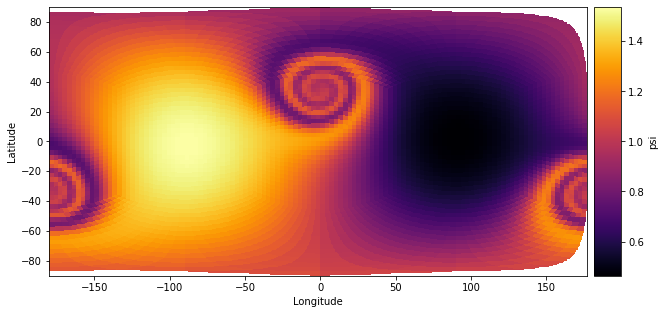

In [8]:
uxds["psi"].plot(width=800, height=400, backend="matplotlib", cmap="inferno")

## Using `hvPlot` to combine UXarray & Xarray Plots

Since UXarray is written using `hvPlot`, we can visualize Xarray and UXarray plots together by using `hvplot.xarray`.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">See also:</p>
    To learn more about hvPlot and Xarray, please refer to the
    <a href="https://hvplot.holoviz.org/user_guide/Gridded_Data.html">hvPlot Documentation</a>
</div>

In [9]:
import holoviews as hv
import hvplot.xarray

hv.extension("bokeh")

In [14]:
(
    xrds.hvplot(cmap="inferno", title="Xarray with hvPlot", width=800, height=400)
    + uxds["psi"].plot(
        cmap="inferno",
        title="UXarray Plot",
        width=800,
        height=400,
        periodic_elements="split",
    )
).cols(1)

:Layout
   .Image.I  :Image   [lon,lat]   (psi)
   .Image.II :Image   [x,y]   (x_y psi)